# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings
import datetime
import statsmodels.api as sm
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,8) 

In [2]:
# este DF extraido de Kaggle muestra las ventas en dólares de una cadena de supermercados estadounidense que vende cafés, tes e infusiones.

sales = pd.read_csv("../regresion_lineal/ficheros/sales.csv")
sales.sample(7)

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
896,386,Florida,East,Major Market,10.0,29.0,51.0,22.0,19.0,7.0,573.0,20.0,0.0,20.0,20.0,8,10/01/10 00:00:00,Herbal Tea,Chamomile,Decaf
2151,573,Missouri,Central,Small Market,11.0,51.0,89.0,38.0,40.0,12.0,256.0,10.0,30.0,40.0,70.0,11,12/01/10 00:00:00,Tea,Darjeeling,Regular
810,339,Massachusetts,East,Major Market,84.0,149.0,298.0,149.0,65.0,41.0,1156.0,100.0,140.0,150.0,290.0,7,05/01/10 00:00:00,Espresso,Regular Espresso,Regular
1100,425,Washington,West,Small Market,24.0,70.0,134.0,56.0,54.0,21.0,385.0,50.0,40.0,70.0,110.0,5,10/01/11 00:00:00,Espresso,Caffe Mocha,Regular
1021,414,Wisconsin,Central,Small Market,3.0,90.0,155.0,65.0,87.0,58.0,513.0,10.0,50.0,80.0,130.0,12,02/01/10 00:00:00,Tea,Earl Grey,Regular
2973,716,New York,East,Major Market,-189.0,-93.0,148.0,241.0,96.0,74.0,5121.0,-150.0,180.0,-80.0,100.0,10,12/01/10 00:00:00,Herbal Tea,Mint,Decaf
2274,603,New Hampshire,East,Small Market,59.0,96.0,159.0,64.0,49.0,21.0,467.0,60.0,60.0,90.0,150.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


url: https://www.kaggle.com/datasets/dsfelix/us-stores-sales 

### Esta es la descripción de nuestras columnas:

- area_code: código de área

- state: estado (EEUU) de la tienda 

- market: región de la tienda (West, Central, East, South)

- market_size: tamaño de la tienda (Small Market, Major Market)

- profit: beneficio en $

- margin: beneficio por cada producto ($)

- sales: valores adquiridos en las ventas ($)

- cogs: coste de los productos vendidos ($)

- total_expenses: gastos totales para conseguir vender el producto ($)

- marketing: gastos de marketing ($)

- inventory: valor de inventario de producto en el momento de la venta ($)

- budget_profit: beneficio esperado ($)

- budget_cogs: presupuesto de coste de productos vendidos ($)

- budget_margin: pres. beneficio + gastos totales o pres ventas - pres. cogs ($)

- budget_sales: presupuesto de ventas ($)

- productid: id de producto

- date: fecha de venta (dd/mm/aaaa)

- product_type: categoría de producto (Espresso, Coffe, Herbal, Tea)

- product: descripción del producto

- type: tipo (Regular, Decaf)

### Partimos de la base de que nuestra variable respuesta va a ser *Profit* .

#### Empezamos la exploración de nuestros datos:

In [3]:
# cambiamos los nombres de las columnas para que nos sea más cómodo trabajar con ellas

nuevas_columnas = {col:col.lower().replace(' ','_') for col in sales.columns}
sales.rename(columns=nuevas_columnas, inplace = True)

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_code       4248 non-null   int64  
 1   state           4248 non-null   object 
 2   market          4248 non-null   object 
 3   market_size     4248 non-null   object 
 4   profit          4248 non-null   float64
 5   margin          4248 non-null   float64
 6   sales           4248 non-null   float64
 7   cogs            4248 non-null   float64
 8   total_expenses  4248 non-null   float64
 9   marketing       4248 non-null   float64
 10  inventory       4248 non-null   float64
 11  budget_profit   4248 non-null   float64
 12  budget_cogs     4248 non-null   float64
 13  budget_margin   4248 non-null   float64
 14  budget_sales    4248 non-null   float64
 15  productid       4248 non-null   int64  
 16  date            4248 non-null   object 
 17  product_type    4248 non-null   o

In [5]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
area_code,4248.0,582.278013,221.140310,203.0,417.00,573.0,772.0,985.0
profit,4248.0,61.097693,101.708546,-638.0,17.00,40.0,92.0,778.0
margin,4248.0,104.293315,94.342522,-302.0,52.75,76.0,132.0,613.0
sales,4248.0,192.987524,151.133127,17.0,100.00,138.0,230.0,912.0
cogs,4248.0,84.433145,67.249769,0.0,43.00,60.0,100.0,364.0
total_expenses,4248.0,54.063559,32.352598,10.0,33.00,46.0,65.0,190.0
marketing,4248.0,31.185028,27.023264,0.0,13.00,22.0,39.0,156.0
inventory,4248.0,749.381356,661.031896,-3534.0,432.00,619.0,910.5,8252.0
budget_profit,4248.0,60.913371,79.546123,-320.0,20.00,40.0,80.0,560.0
budget_cogs,4248.0,74.830508,66.238145,0.0,30.00,50.0,90.0,450.0


In [6]:
sales.isnull().sum()

area_code         0
state             0
market            0
market_size       0
profit            0
margin            0
sales             0
cogs              0
total_expenses    0
marketing         0
inventory         0
budget_profit     0
budget_cogs       0
budget_margin     0
budget_sales      0
productid         0
date              0
product_type      0
product           0
type              0
dtype: int64

In [7]:
sales.duplicated().sum()

0

### Exploramos los valores únicos de las columnas categóricas:

In [8]:
sales["market_size"].unique()

array(['Small Market', 'Major Market'], dtype=object)

In [9]:
sales["market"].unique()

array(['East', 'West', 'South', 'Central'], dtype=object)

In [10]:
sales["state"].unique()

array(['Connecticut', 'Washington', 'California', 'Texas', 'New York',
       'Ohio', 'Illinois', 'Louisiana', 'Florida', 'Wisconsin',
       'Colorado', 'Missouri', 'Iowa', 'Massachusetts', 'Oklahoma',
       'Utah', 'Oregon', 'New Mexico', 'New Hampshire', 'Nevada'],
      dtype=object)

In [11]:
sales["product_type"].unique()

array(['Coffee', 'Tea', 'Espresso', 'Herbal Tea'], dtype=object)

In [12]:
sales["product"].unique()

array(['Columbian', 'Green Tea', 'Caffe Mocha', 'Decaf Espresso', 'Lemon',
       'Mint', 'Darjeeling', 'Decaf Irish Cream', 'Chamomile',
       'Earl Grey', 'Caffe Latte', 'Amaretto', 'Regular Espresso'],
      dtype=object)

In [13]:
sales["date"].unique()

array(['04/01/10 00:00:00', '07/01/10 00:00:00', '11/01/10 00:00:00',
       '12/01/10 00:00:00', '07/01/11 00:00:00', '08/01/11 00:00:00',
       '09/01/11 00:00:00', '10/01/11 00:00:00', '11/01/11 00:00:00',
       '06/01/10 00:00:00', '10/01/10 00:00:00', '01/01/11 00:00:00',
       '02/01/11 00:00:00', '03/01/11 00:00:00', '04/01/11 00:00:00',
       '05/01/11 00:00:00', '12/01/11 00:00:00', '02/01/10 00:00:00',
       '05/01/10 00:00:00', '08/01/10 00:00:00', '03/01/10 00:00:00',
       '09/01/10 00:00:00', '06/01/11 00:00:00', '01/01/10 00:00:00'],
      dtype=object)

In [14]:
# modificamos el tipo de dato de la columna fecha

sales["date"] = sales["date"].astype("datetime64")

In [15]:
sales["date"].dtypes

dtype('<M8[ns]')

### Examinamos la columna *profit* para verla más en detalle, ya que es nuestra variable respuesta:

In [16]:
sales.head(2)

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,inventory,budget_profit,budget_cogs,budget_margin,budget_sales,productid,date,product_type,product,type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,2010-04-01,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2010-07-01,Coffee,Columbian,Regular


In [17]:
print(sales.profit.mean())
print(sales.profit.median())
print(sales.profit.mode())

61.097693032015066
40.0
0    47.0
Name: profit, dtype: float64


- Beneficio por producto y tipo de producto:

In [18]:
top_ten_producto = sales.groupby('product')['profit'].agg(top_ten_producto=('sum'))
top_ten_producto =top_ten_producto.reset_index()
top_ten_producto.sort_values(by = 'top_ten_producto',ascending = False,inplace =True)
top_ten_producto[0:10]

,product,top_ten_producto
4,Columbian,55804.0
10,Lemon,29869.0
6,Decaf Espresso,29502.0
5,Darjeeling,29053.0
3,Chamomile,27231.0
8,Earl Grey,24164.0
2,Caffe Mocha,17678.0
7,Decaf Irish Cream,13989.0
1,Caffe Latte,11375.0
12,Regular Espresso,10065.0


In [19]:
top_ten_product_type = sales.groupby(['product','product_type'])['profit'].agg(top_ten_product_type=('sum'))
top_ten_product_type =top_ten_product_type.reset_index()
top_ten_product_type.sort_values(by = 'top_ten_product_type',ascending = False,inplace =True)
top_ten_product_type[0:10]

,product,product_type,top_ten_product_type
4,Columbian,Coffee,55804.0
10,Lemon,Herbal Tea,29869.0
6,Decaf Espresso,Espresso,29502.0
5,Darjeeling,Tea,29053.0
3,Chamomile,Herbal Tea,27231.0
8,Earl Grey,Tea,24164.0
2,Caffe Mocha,Espresso,17678.0
7,Decaf Irish Cream,Coffee,13989.0
1,Caffe Latte,Espresso,11375.0
12,Regular Espresso,Espresso,10065.0


- Beneficio por zonas:

In [20]:
top_ten_estado = sales.groupby('market')['profit'].agg(top_ten_estado=('sum'))
top_ten_estado =top_ten_estado.reset_index()
top_ten_estado.sort_values(by = 'top_ten_estado',ascending = False,inplace =True)
top_ten_estado

,market,top_ten_estado
0,Central,93852.0
3,West,73996.0
1,East,59217.0
2,South,32478.0


- Beneficio por ciudades:

In [21]:
top_ten_market_state = sales.groupby('state')['profit'].agg(top_ten_market_state=('sum'))
top_ten_market_state =top_ten_market_state.reset_index()
top_ten_market_state.sort_values(by = 'top_ten_market_state',ascending = False,inplace =True)
top_ten_market_state[0:10]

,state,top_ten_market_state
0,California,31785.0
4,Illinois,30821.0
5,Iowa,22212.0
12,New York,20096.0
1,Colorado,17743.0
7,Massachusetts,16442.0
16,Texas,15766.0
15,Oregon,12439.0
3,Florida,12310.0
18,Washington,11405.0


- Beneficio por tamaño de mercado:

In [22]:
profit_market_size = sales.groupby('market_size')['profit'].agg(profit_market_size=('sum'))
profit_market_size =profit_market_size.reset_index()
profit_market_size.sort_values(by = 'profit_market_size',ascending = False,inplace =True)
profit_market_size

,market_size,profit_market_size
0,Major Market,155736.0
1,Small Market,103807.0


### Creamos la columna *mes* para conocer los meses con más y menos beneficio:

In [23]:
import datetime

In [24]:
sales['mes']= sales['date'].dt.month
sales.head(2)

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,...,budget_profit,budget_cogs,budget_margin,budget_sales,productid,date,product_type,product,type,mes
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,...,110.0,110.0,160.0,270.0,2,2010-04-01,Coffee,Columbian,Regular,4
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,...,90.0,80.0,130.0,210.0,2,2010-07-01,Coffee,Columbian,Regular,7


In [25]:
profit_mes = sales.groupby('mes')['profit'].agg(profit_mes=('sum'))
profit_mes =profit_mes.reset_index()
profit_mes.sort_values(by = 'profit_mes',ascending = False,inplace =True)
profit_mes

,mes,profit_mes
6,7,23576.0
5,6,22789.0
7,8,22771.0
11,12,21900.0
9,10,21552.0
3,4,21533.0
4,5,21295.0
8,9,21135.0
10,11,20859.0
1,2,20788.0


### Creamos la columna *año* para conocer si hay diferencias en el beneficio:

In [26]:
sales['date'].dtypes

dtype('<M8[ns]')

In [27]:
sales['año']= sales['date'].astype('datetime64').dt.year
sales.head(2)

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,...,budget_cogs,budget_margin,budget_sales,productid,date,product_type,product,type,mes,año
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,...,110.0,160.0,270.0,2,2010-04-01,Coffee,Columbian,Regular,4,2010
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,...,80.0,130.0,210.0,2,2010-07-01,Coffee,Columbian,Regular,7,2010


In [28]:
sales['año'].unique()

array([2010, 2011], dtype=int64)

In [29]:
profit_año = sales.groupby('año')['profit'].agg(profit_año=('sum'))
profit_año =profit_año.reset_index()
profit_año.sort_values(by = 'profit_año',ascending = False,inplace =True)
profit_año

,año,profit_año
1,2011,153717.0
0,2010,105826.0


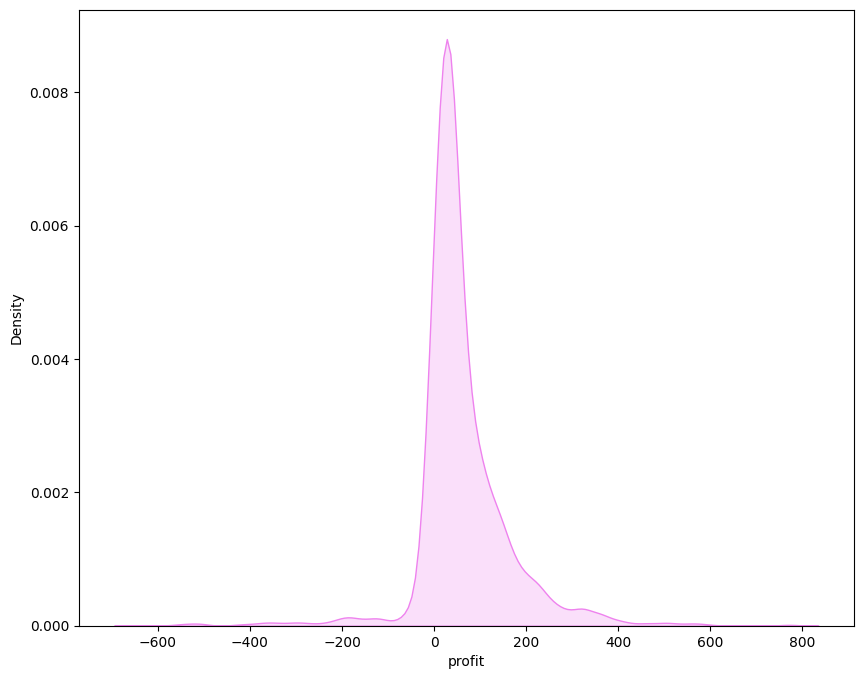

In [30]:
# vamos a ver como está distribuida nuestra variable respuesta

sns.distplot(
    sales["profit"], 
    hist = False, 
    color = "violet", 
    kde_kws = {"shade": True, "linewidth": 1});

Hasta aquí concluimos que:

- el año con más beneficio fue 2011,
- los supermercados más grandes son los que tienen un beneficio mayor,
- la ciudad más rentable para el negocio es California,
- la zona con más beneficio es la Central,
- el producto más vendido es el café Columbian,
- nuestros datos presentan más beneficios que pérdidas, pero a su vez el beneficio es muy pequeño (mucha concentración de datos cercana a 0, como vemos en el displot).


### Identificamos los outliers:

In [31]:
sales_num = sales.select_dtypes(include=np.number)
sales_num.columns

Index(['area_code', 'profit', 'margin', 'sales', 'cogs', 'total_expenses',
       'marketing', 'inventory', 'budget_profit', 'budget_cogs',
       'budget_margin', 'budget_sales', 'productid', 'mes', 'año'],
      dtype='object')

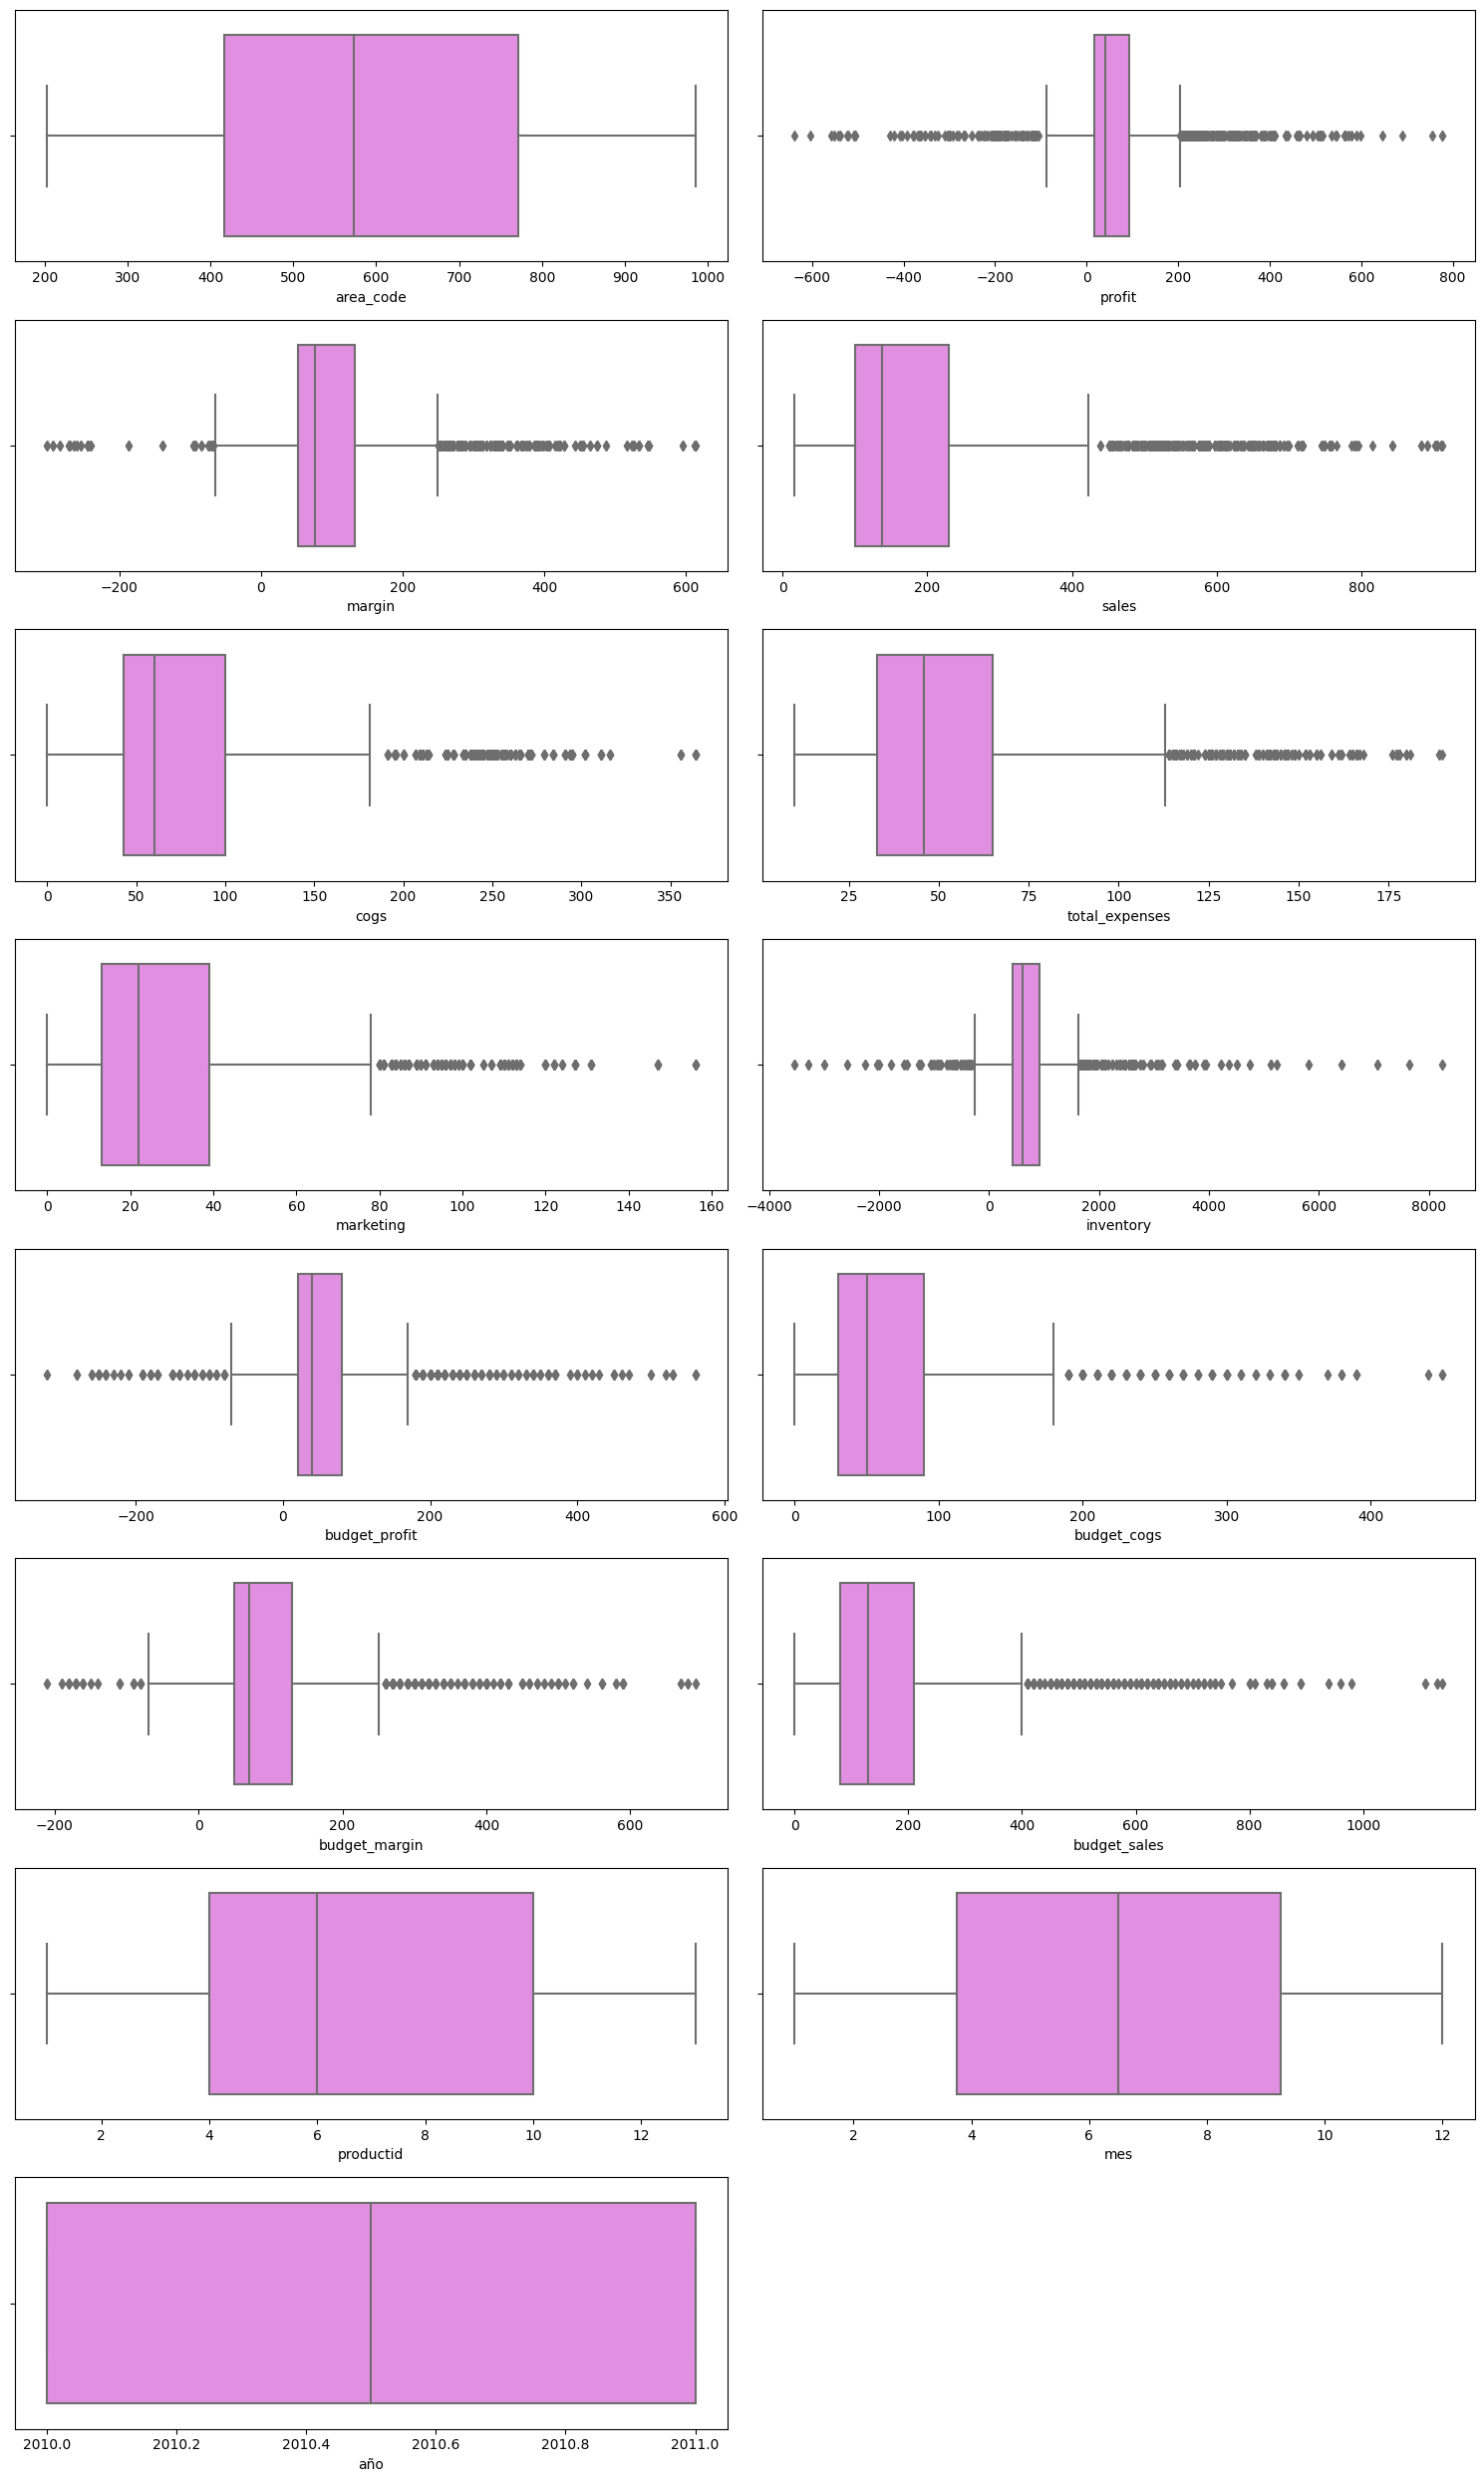

In [32]:
# identificamos outliers

fig, axes = plt.subplots(8, 2, figsize=(15,25))

axes = axes.flat

for i, col in enumerate(sales_num.columns):
    sns.boxplot(x = sales_num[col], data = sales_num, ax=axes[i], color = "violet")

plt.delaxes(axes[-1])
plt.tight_layout()
plt.show();

Optamos por sustituir los valores de los outliers por la mediana.

In [33]:
# identificamos los outliers 

def outliers (lista_col, df):

    dicc_ind = {}

    for col in lista_col:

        Q1 = np.nanpercentile(sales_num[col], 25)
        Q3 = np.nanpercentile(sales_num[col], 75)

        IQR = Q3-Q1

        outlier_step = 1.5*IQR

        outliers_data = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)]

        if outliers_data.shape[0] > 0:
            
            dicc_ind[col] = (list(outliers_data.index))

    return dicc_ind

In [34]:
# creamos una lista con nuestras columnas numéricas sin mes ni año

lista_col_num = ['area_code', 'profit', 'margin', 'sales', 'cogs', 'total_expenses',
       'marketing', 'inventory', 'budget_profit', 'budget_cogs',
       'budget_margin', 'budget_sales', 'productid']


In [35]:
ind = outliers(lista_col_num, sales)

In [36]:
ind.keys()

dict_keys(['profit', 'margin', 'sales', 'cogs', 'total_expenses', 'marketing', 'inventory', 'budget_profit', 'budget_cogs', 'budget_margin', 'budget_sales'])

In [37]:
# sustituimos los outliers por la mediana

for k, v in ind.items():
    median = (sales[k]).median()
    for i in v:
        sales.loc[i,k] = median

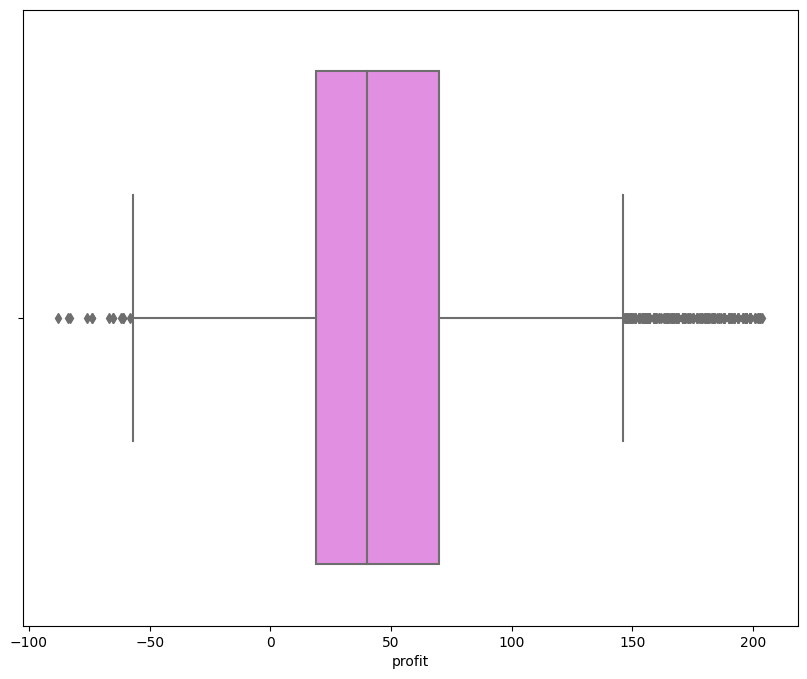

In [38]:
# comprobamos visualmente que los outliers para la columna "profit" se han modificado por la mediana

sns.boxplot(x = sales["profit"], data = sales, color = "violet")

plt.show();

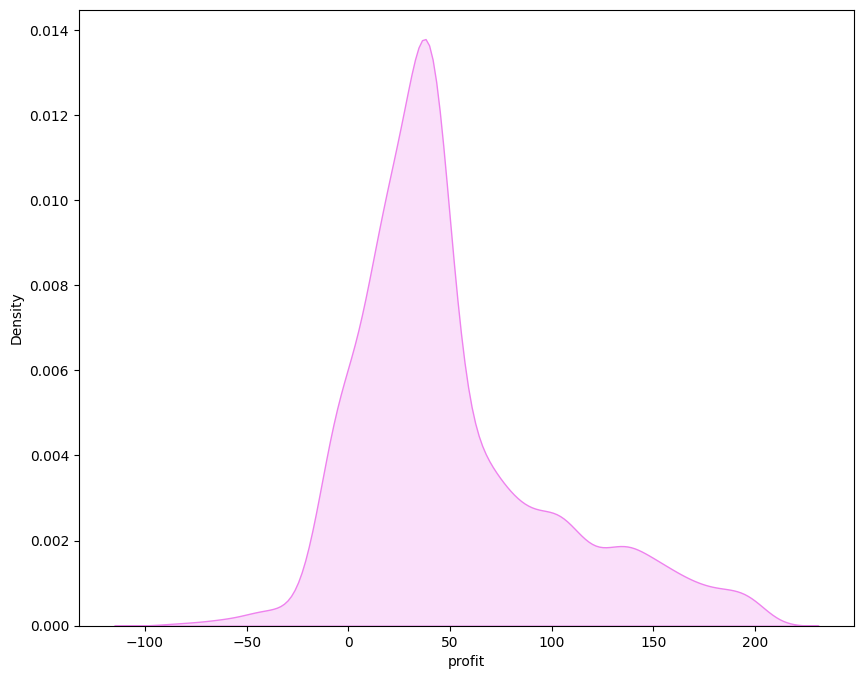

In [39]:

sns.distplot(
    sales["profit"], 
    hist = False, 
    color = "violet", 
    kde_kws = {"shade": True, "linewidth": 1});

### Averiguamos los valores exactos de beneficio más altos y más bajos:

In [40]:
print(sales["profit"].max())
print(sales["profit"].min())

204.0
-88.0


In [41]:
sales[(sales["profit"] == 204.0)]

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,...,budget_cogs,budget_margin,budget_sales,productid,date,product_type,product,type,mes,año
2545,631,New York,East,Major Market,204.0,76.0,138.0,60.0,46.0,22.0,...,180.0,240.0,130.0,9,2010-11-01,Herbal Tea,Lemon,Decaf,11,2010


In [42]:
sales[(sales["profit"] == -88.0)]

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,...,budget_cogs,budget_margin,budget_sales,productid,date,product_type,product,type,mes,año
3952,951,California,West,Major Market,-88.0,-25.0,102.0,127.0,63.0,40.0,...,150.0,-30.0,120.0,1,2010-12-01,Coffee,Amaretto,Regular,12,2010


- Como podemos observar, el producto con mayor beneficio es el té de limón sin cafeína vendido en un mercado de tamaño grande en la zona este de Nueva York.

- Por el contrario, vemos que el producto que presenta menos beneficio es el café amaretto vendido en un supermercado de tamaño grande en la zona oeste de California.

In [43]:
sales_num.drop(["mes", "año", "productid"], axis= 1, inplace= True)

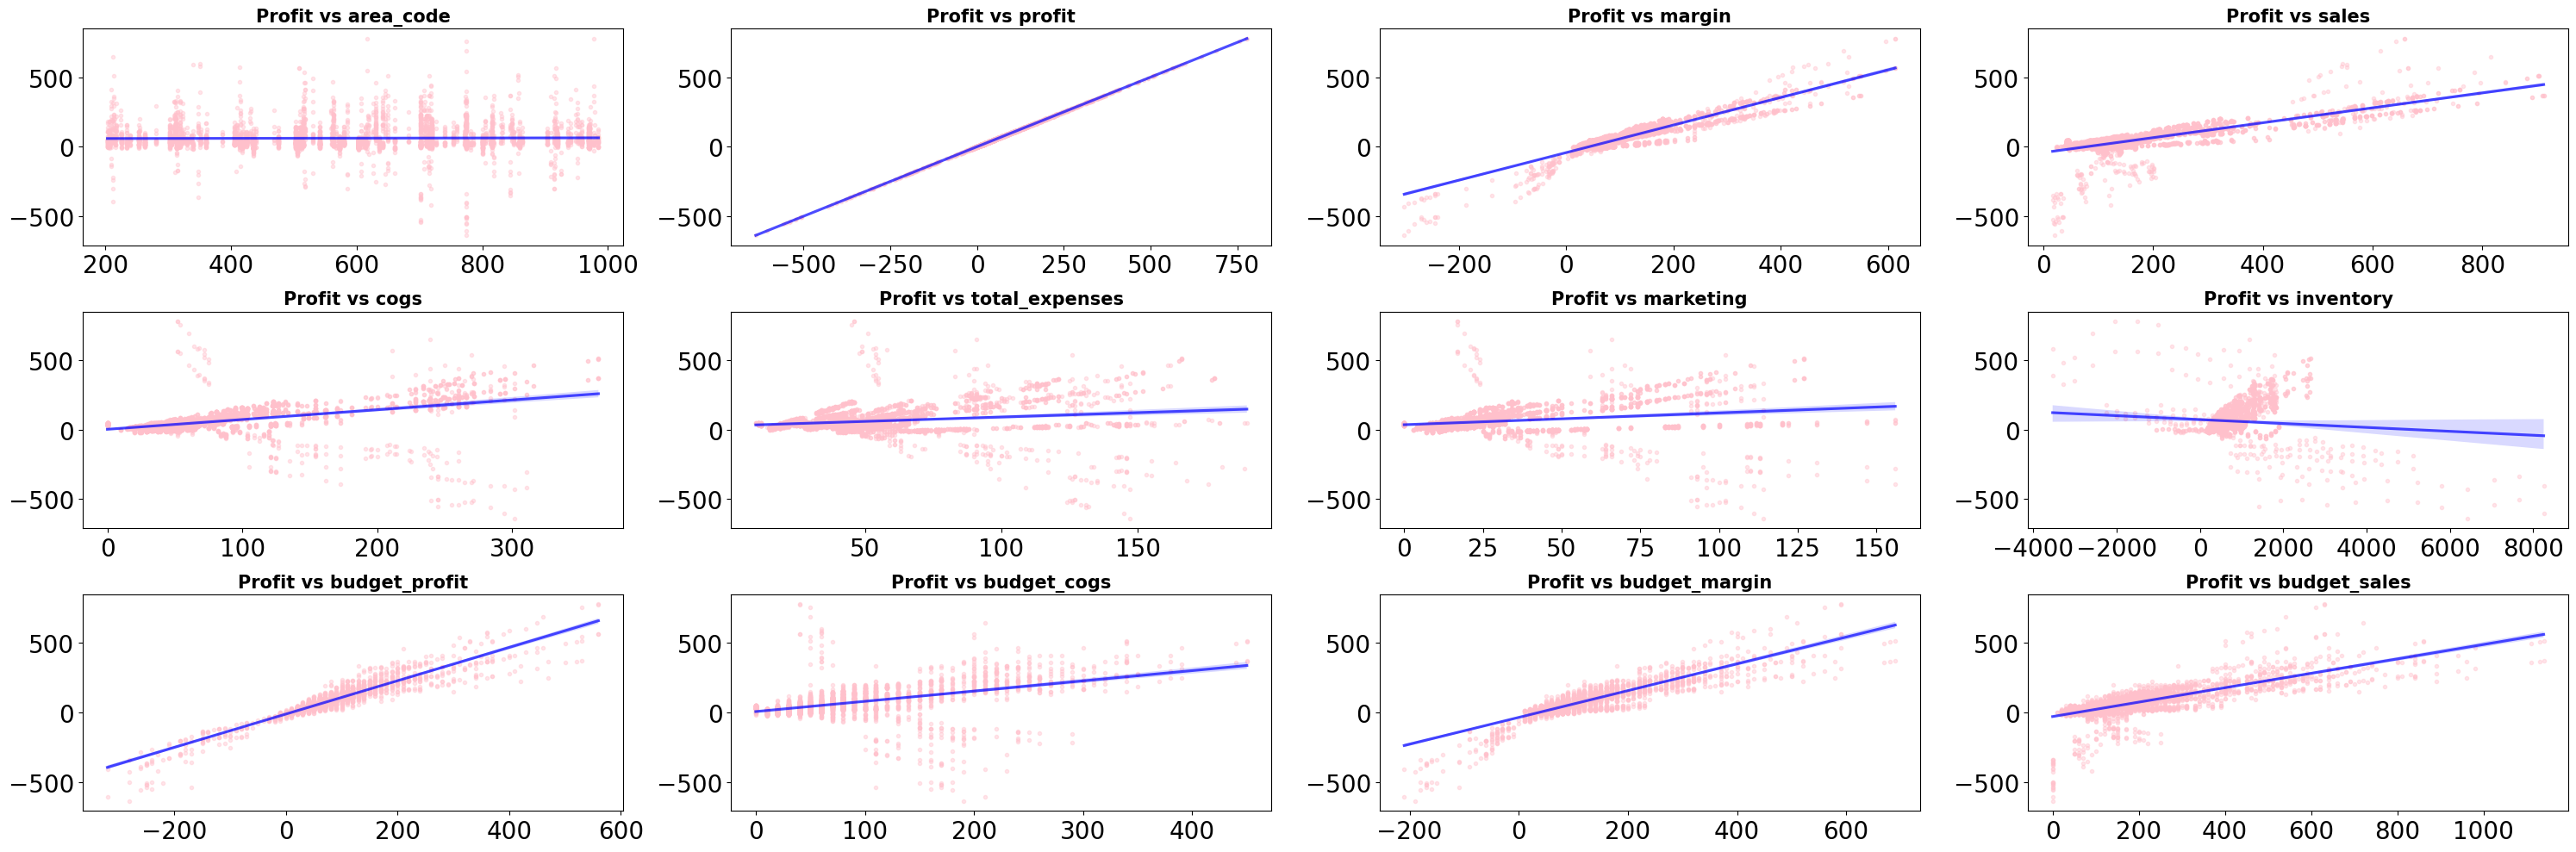

In [44]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# Queremos ver qué variables están más relacionadas con profit
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (30, 10))


axes = axes.flat

columnas_numeric = sales_num.columns

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = sales_num[colum], 
        y = sales_num["profit"], 
        color = "pink", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "blue", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Profit vs {colum}", fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()


Podemos observar que la variables que aparentemente está menos relacionada con *profit* es *inventory*.

In [45]:
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (100, 80))
axes = axes.flat
for i, colum in enumerate(sales_num.columns): 
    sns.histplot(
        data = sales_num[colum],
        kde = True,
        color = "violet", 
        line_kws = {"linewidth": 6}, 
        alpha = 0.5,
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 40, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

Podemos obervar que hay ciertas columnas que más o menos se asemejan a una campana de Gauss y que podrían ser normales.

In [46]:
sales.to_csv("../regresion_lineal/ficheros/sales2.csv")